# Wine Quality Analysis

In [1]:
from platform import python_version
print(python_version())

3.9.12


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [3]:
file = "Red_wine_.csv"

In [4]:
df = pd.read_csv(file)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


## Exploring Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


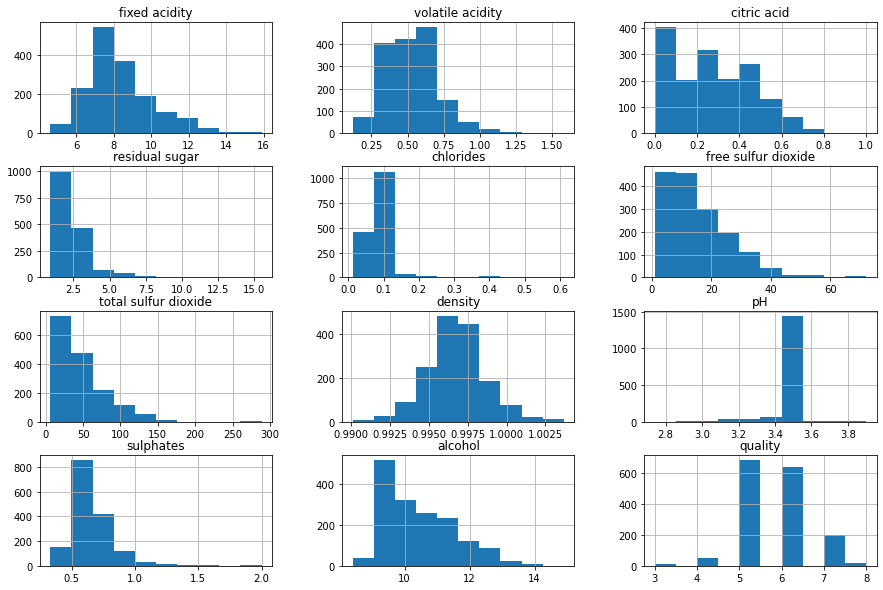

In [7]:
df.hist(figsize=(15,10))
plt.show()

Text(0, 0.5, 'alcohol')

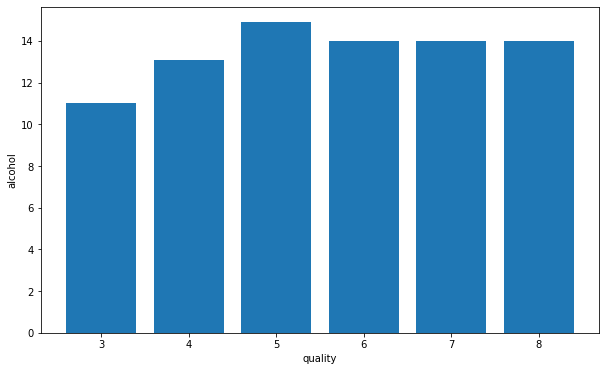

In [8]:
plt.figure(figsize=[10,6])
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')

### Correlation

<AxesSubplot:>

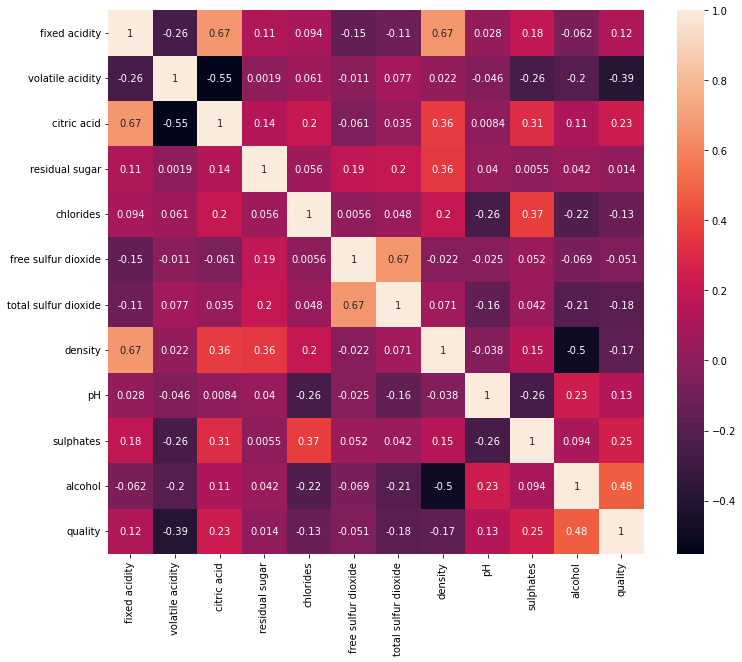

In [9]:
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(),annot=True)

### Finding  missing values and removing them 

In [10]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [11]:
df.update(df.fillna(df.mean()))

In [12]:
#Filling for categorical values
df = pd.get_dummies(df,drop_first=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


<AxesSubplot:>

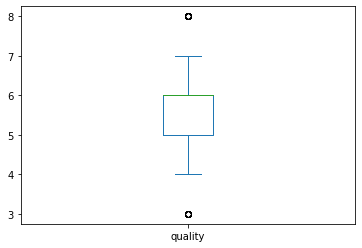

In [13]:
df['quality'].plot(kind='box')

In [14]:
df['best quality'] = [1 if x>=7 else 0 for x in df.quality]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0,0


## ML Modeling

In [15]:
x = df.drop(['quality','best quality'], axis = 1)
y = df['best quality']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [16]:
from sklearn.preprocessing import MinMaxScaler
normal = MinMaxScaler()

In [17]:
#Fitting Data
normal_fit = normal.fit(x_train)
new_xtrain = normal_fit.transform(x_train)
new_xtest = normal_fit.transform(x_test)
print(new_xtrain)
print(new_xtest)

[[0.33628319 0.41322314 0.12       ... 0.67241379 0.33532934 0.52307692]
 [0.3539823  0.4338843  0.25       ... 0.67241379 0.16167665 0.24615385]
 [0.47787611 0.19008264 0.45       ... 0.67241379 0.05988024 0.15384615]
 ...
 [0.23893805 0.43801653 0.         ... 0.56034483 0.08383234 0.24615385]
 [0.28318584 0.33884298 0.33       ... 0.67241379 0.16167665 0.16923077]
 [0.38938053 0.39669421 0.29       ... 0.67241379 0.14371257 0.24615385]]
[[0.48672566 0.20661157 0.34       ... 0.67241379 0.19161677 0.33846154]
 [0.08849558 0.15702479 0.37       ... 0.5        0.1497006  0.12307692]
 [0.42477876 0.31404959 0.34       ... 0.67241379 0.11377246 0.35384615]
 ...
 [0.05309735 0.16528926 0.25       ... 0.55172414 0.13173653 0.12307692]
 [0.52212389 0.09917355 0.42       ... 0.67241379 0.43113772 0.36923077]
 [0.08849558 0.34710744 0.04       ... 0.67241379 0.1497006  0.46153846]]


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rand = RandomForestClassifier()

In [19]:
#Fitting Data
fit_rand = rand.fit(new_xtrain, y_train)
#predicting score
rand_score = rand.score(new_xtest, y_test)
print('Score of model is : ', rand_score*100,'%')

Score of model is :  91.5625 %


### Finding error 

In [20]:
#Display Error
#Calculating Mean Squared Error
from sklearn.metrics import mean_squared_error
Yhat = rand.predict(new_xtest)

In [21]:
rand_MSE = mean_squared_error(y_test, Yhat)
rand_RMSE = np.sqrt(rand_MSE)

In [22]:
print('Mean Square Error is: ', rand_MSE)
print('Root Mean Square Error is: ', rand_RMSE)

Mean Square Error is:  0.084375
Root Mean Square Error is:  0.2904737509655563


### Result

In [23]:
x_predict = list(rand.predict(x_test))
predicted_df = {'predicted_values': x_predict,'original_values': y_test}

In [24]:
print(classification_report(x_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       312
           1       0.02      0.12      0.04         8

    accuracy                           0.83       320
   macro avg       0.50      0.49      0.47       320
weighted avg       0.95      0.83      0.89       320



In [25]:
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
1035,0,1
49,0,0
799,0,0
538,0,1
660,0,0
990,0,0
398,0,0
1068,0,1
1155,0,0
468,0,0


Accuracy is 91.25%